> - Author: lebhoryi@gmail.com
> - Date  : 2020/07/09
> - File  : mnist with tensorflow 2 

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers, datasets, utils
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow import keras

print(f"The tensorflow version is : {tf.__version__}\n")
print(f"The numpy version is : {np.__version__}\n")
print(f"The keras version is : {keras.__version__}")

The tensorflow version is : 2.3.0-dev20200515

The numpy version is : 1.16.4

The keras version is : 2.2.4-tf


> 创建四个文件夹

In [2]:
# create dir
_list = ['data', 'image', 'model', 'Mnist']

# 赋值为 Path 对象
dirs = list(map(lambda x: Path(x), _list))
# 假如没有文件夹就创建
for path in dirs:
    if not path.exists():
        path.mkdir()

data_path, image_path, model_path, Mnist_path = dirs

载入并准备好[ MNIST 数据集](http://yann.lecun.com/exdb/mnist/)。将样本从整数转换为浮点数：

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


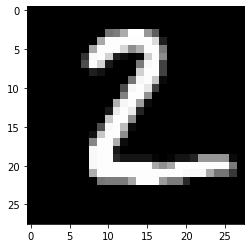

In [3]:
(x_train, y_train), (x_test, y_test) = \
        datasets.mnist.load_data(data_path.resolve()/'mnist.npz')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
plt.imshow(x_test[1], cmap='gray')
plt.savefig('./image/tes_2.jpg')
plt.show()

In [4]:
# Normalize data，将图像的像素值都处理到[0,1]范围
x_train, x_test = x_train / 255, x_test / 255
print(f"x_train shape : {x_train.shape}\n")

x_train, x_test = tf.expand_dims(x_train, -1), tf.expand_dims(x_test, -1)
print(f"add dim x_train shape : {x_train.shape}")

x_train shape : (60000, 28, 28)

add dim x_train shape : (60000, 28, 28, 1)


## tensorflow 官方例程

```python
# build network
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
```

In [5]:
# build network
tf.keras.backend.clear_session()

model = models.Sequential()
# conv1
model.add(layers.Conv2D(input_shape=(28, 28, 1), filters=4, 
    kernel_size=(3, 3), activation='relu', name='conv1'))
model.add(layers.MaxPool2D(pool_size=(2,2), name='pool1'))

# conv2
model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), 
                        activation='relu', name='conv2'))
model.add(layers.MaxPool2D(pool_size=(2,2), name='pool2'))

# flattern
model.add(layers.Dropout(rate=0.5, name='dropout'))
model.add(layers.Flatten(name='flatten'))

# FC
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 4)         40        
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 13, 13, 4)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 8)         296       
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

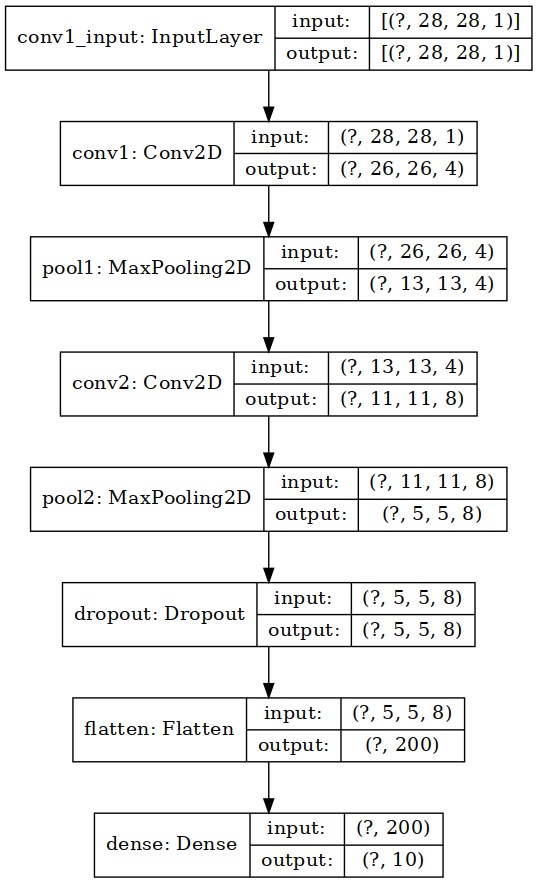

In [6]:
# save model image
utils.plot_model(model, to_file=image_path/'model.png', show_shapes=True,
        show_layer_names=True, rankdir='TB', dpi=100, expand_nested=True)

In [7]:
# save model txt
with open(model_path / 'model.txt', 'wt') as fd:
    str_list = []
    model.summary(print_fn=lambda x:str_list.append(x))
    model_summary = '\n'.join(str_list)
    fd.write(model_summary)

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy',])
history = model.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 1.0060 - accuracy: 0.6662
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4147 - accuracy: 0.8718
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3313 - accuracy: 0.8967
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2920 - accuracy: 0.9107
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2694 - accuracy: 0.9168


In [9]:
# return loss and acc
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"The loss is : \n    {loss}\n")
print(f"The accuracy is : \n    {acc}")

313/313 - 1s - loss: 0.1226 - accuracy: 0.9651
The loss is : 
    0.12255673855543137

The accuracy is : 
    0.9650999903678894


In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    epochs =range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'ro--')
    # 相关属性
    plt.title('Training ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_'+metric])
    plt.show()

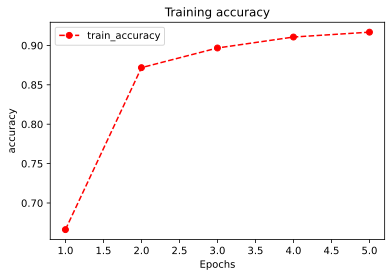

In [11]:
plot_metric(history, 'accuracy')

## 验证 model 是否成功训练

1. 用 test 数据集进行推理

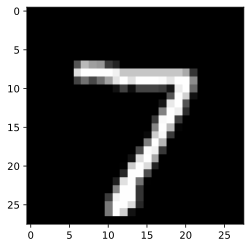

predict : 7


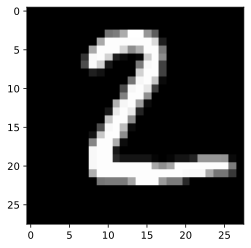

predict : 2


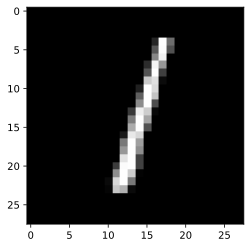

predict : 1


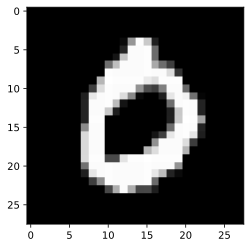

predict : 0


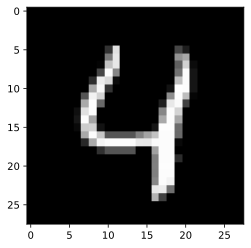

predict : 4


In [12]:
for img in x_test[:5]:
    y = model.predict(tf.expand_dims(img, axis=0))
    #  获取概率最高的元素的索引
    p = np.argmax(y)
    plt.imshow(img[:, :, 0], cmap="gray")
    plt.show()
    print(f"predict : {p}")

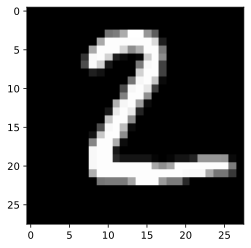

In [13]:
# save image array
plt.imshow(x_test[1][:, :, 0], cmap='gray')
plt.show()
a = x_test[1].numpy()
a = a.flatten()
with open('./image/IMG0_2.txt', 'w+') as f:
    f.write('#define IMG0_2 {')
    f.write(str(a.tolist())[1:-1])
    f.write('}\n')
# tf.squeeze(a, axis=-1)
# a

2. 给定一个自定义的手写数字,进行识别

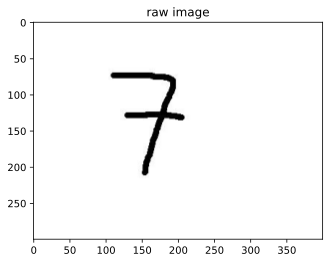

8

In [14]:
def inference_my_image(img_path):
    # read image
    image_raw = tf.io.read_file(str(img_path))
    image_raw = tf.image.decode_jpeg(image_raw)
    # float to int 
    
    plt.title("raw image")
    plt.imshow(image_raw[:, :, 0], cmap='gray')
    plt.show()

    # 将图片转换为灰度图片, 网络中的输入是灰度图, 保持一致
    img = tf.image.rgb_to_grayscale(image_raw)

    # resize
    img = tf.image.resize(images=img, size=(28, 28), method='area')

    # 推理时, batch 为 1
    img = tf.expand_dims(img, axis=0)

    y = model.predict(img)
    p = np.argmax(y)
    return p

# imgs = image_path.glob('*.jpg')
# for img in imgs:
#     print(f"predict : {inference_my_image(img)}")
inference_my_image('./image/7_1.jpg')

In [15]:
# save model
keras_file = model_path / 'mnist.h5'
model.save(keras_file)

# load model and test
new_file = models.load_model(keras_file)
new_file.summary()

loss, acc = model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 4)         40        
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 13, 13, 4)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 8)         296       
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

In [16]:
# save weights
model.save_weights(model_path / 'model_weights.h5')

# load weights
model.load_weights(model_path / 'model_weights.h5')

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy',])
loss, acc = model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9651
Restored model, accuracy: 96.51%


In [17]:
from tensorflow.keras import backend as K

def get_layer_output(model, x, index=-1):
    """
    get the computing result output of any layer you want, 
    default the last layer.
    :param model: primary model
    :param x: input of primary model( x of model.predict([x])[0])
    :param index: index of target layer, i.e., layer[23]
    :return: result
    """
    layer = K.function([model.input], [model.layers[index].output])
    return layer([x])[0]

for i in range(len(model.layers)):
    layer = get_layer_output(model, tf.expand_dims(x_test[0], axis=0), i)
    print(f"第{i} 层:")
    print(f"max : {layer.max()}")
    print(f"min : {layer.min()}")


第0 层:
max : 3.807013511657715
min : 0.0
第1 层:
max : 3.807013511657715
min : 0.0
第2 层:
max : 4.1608452796936035
min : 0.0
第3 层:
max : 4.1608452796936035
min : 0.0
第4 层:
max : 4.1608452796936035
min : 0.0
第5 层:
max : 4.1608452796936035
min : 0.0
第6 层:
max : 0.9999656677246094
min : 7.474905162072401e-14


In [18]:
# save json
json_file = model_path / 'mnist.json'
with open(json_file, 'w') as j_f:
    j_f.write(model.to_json())

In [19]:
# convert to tflite model
tflite_model = tf.keras.models.load_model(keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
with open(model_path/'mnist.tflite', 'wb') as f:
    f.write(tflite_save)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpbk38l1et/assets


In [20]:
# 读取权重 h5 文件
import h5py

weights_file = model_path / 'model_weights.h5'
weights_txt = model_path / 'model_weights_int.txt'

def traverse_datasets(hdf_file):
    def h5py_dataset_iterator(g, prefix=''):
        for key in g.keys():
            item = g[key]
            path = f'{prefix}/{key}'
            if isinstance(item, h5py.Dataset): # test for dataset
                yield (path, item)
            elif isinstance(item, h5py.Group): # test for group (go down)
                yield from h5py_dataset_iterator(item, path)

    for path, _ in h5py_dataset_iterator(hdf_file):
        yield path
        
h5_f = h5py.File(weights_file, 'r')
with open(weights_txt, 'w+') as f:
    for dset in traverse_datasets(h5_f):
        
        weight = h5_f[dset].value * 2**7
        weight = weight.flatten()
        print(len(weight))
        weight = weight.astype(np.int32)
        print(h5_f[dset].name)
        f.write(h5_f[dset].name + " : ")
        f.write(str(weight.tolist()))
        f.write('\n\n')
        
h5_f.close()

4
/conv1/conv1/bias:0
36
/conv1/conv1/kernel:0
8
/conv2/conv2/bias:0
288
/conv2/conv2/kernel:0
10
/dense/dense/bias:0
2000
/dense/dense/kernel:0
